In [82]:
from CodigoLimpieza import CargayAnalisisdeDatos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Concatenate, BatchNormalization

# Red Neuronal para sistemas de Precios.

## Carga de Datos de Información

In [124]:
Datos = CargayAnalisisdeDatos()
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   titulo             1426336 non-null  object 
 1   estrellas          1426337 non-null  float64
 2   comentarios        1426337 non-null  int64  
 3   precio             1426337 non-null  float64
 4   precio de lista    1426337 non-null  float64
 5   Categoria          1426337 non-null  int64  
 6   mejor vendido      1426337 non-null  int32  
 7   ventas ultimo mes  1426337 non-null  int64  
 8   oferta             1426337 non-null  int32  
dtypes: float64(3), int32(2), int64(3), object(1)
memory usage: 87.1+ MB


### Eleccion de Variables Dependientes e independientes

In [4]:
x = Datos[['estrellas', 'comentarios','precio de lista','mejor vendido','ventas ultimo mes']].values # Datos independientes en el modelo
y_clasificacion = Datos['oferta'].values # Modelo de Clasificacion para evaluacion de informacion
y_regression = Datos['precio'].values # Modelo de Regresion para simulacion de precios.

### Separación de Datos de Entrenamiento y Testeo.

In [5]:
#Separamos los datos en clasificacion y testeo con el fin de usar la mayor cantidad de datos en el entrenamiento el 80% y 20% para evitar sobreajuste.
x_train, x_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    x, y_clasificacion, y_regression, test_size= 0.2, random_state= 45
)

### Construccion del Modelo.

In [88]:
input_layer = Input(shape = (x.shape[1],)) # Aqui le decimos cuantas independientes agregaremos al modelo o ingresaran a el
hidden_layer = Dense(128, activation='relu')(input_layer) # Aqui le agregamos un tipo de capa densa con una activacion relu.
hidden_layer_with_bn = BatchNormalization()(hidden_layer)
classification_output = Dense(1, activation='softmax', name='classification_output')(hidden_layer)
regression_output = Dense(1, activation='linear', name='regression_output')(hidden_layer)


#### Teoria detras del proceso.
##### Capa Densa.
En pocas palabras, una capa densa (o fully connected) en una red neuronal es una capa en la que cada nodo o neurona está conectado a cada nodo de la capa anterior, transmitiendo información de manera completa. Cada conexión entre nodos tiene un peso que se ajusta durante el entrenamiento para aprender patrones en los datos. La capa densa es fundamental para la representación y aprendizaje de características complejas en datos.
##### Función de Activación.
Es una funcion de Activacion, las cuales sirven para introducir parametros no lineales para aprender patrones mas complejos de los datos, imaginese que es una manera de hacer equivocar al modelo o ponerle una lupa a cada neurona que le de un paradigma distinto de pensamiento o de patrón.

##### Funcion Relu.
En otras palabras, la función ReLU toma un valor de entrada x y devuelve x si x es positivo o cero, y devuelve cero si x es negativo. Matemáticamente, se puede expresar como una función por partes:
$$
ReLU(x) = max(0,x)
$$

##### Función Sigmoide.

Aquí, e es la base del logaritmo natural (aproximadamente 2.71828), y "x" es la entrada de la función. La función sigmoide produce valores en el rango de 0 a 1, lo que la hace útil en problemas de clasificación binaria, ya que puede interpretarse como la probabilidad de pertenecer a la clase positiva.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

In [9]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

### Escalamos los datos independientes a su version Standarizada
Esto lo hacemos con el fin de evitar Heterocedasticidad al igual que el proceso logartimico.
$$
z = \frac{x - media}{\sigma}
$$
La desventaja es que esto hace que los coeficientes no tengan sentido lógico pero se me ocurrio una idea de encontrarlo la cual explicare en pasos futuros.

In [89]:
model = keras.Model(inputs=input_layer, outputs=[classification_output, regression_output])
model.compile(optimizer='adam',
              loss={'classification_output': 'binary_crossentropy', 'regression_output': 'mean_squared_error'},
              metrics={'classification_output': 'accuracy', 'regression_output': 'mae'})
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 128)          768         ['input_7[0][0]']                
                                                                                                  
 classification_output (Dense)  (None, 1)            129         ['dense_16[0][0]']               
                                                                                                  
 regression_output (Dense)      (None, 1)            129         ['dense_16[0][0]']               
                                                                                            

Este es un modelo que tomara en cuenta 514 parametros

#### Entrenamiento

In [91]:
history = model.fit(X_train_scaled, {'classification_output': y_class_train, 'regression_output': y_reg_train},
                epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
28527/28527 [==============================] - 17s 598us/step - loss: 965.9257 - classification_output_loss: 0.5393 - regression_output_loss: 965.3853 - classification_output_accuracy: 0.7577 - regression_output_mae: 6.1496 - val_loss: 170.2990 - val_classification_output_loss: 0.5339 - val_regression_output_loss: 169.7649 - val_classification_output_accuracy: 0.7583 - val_regression_output_mae: 4.1843
Epoch 2/10
28527/28527 [==============================] - 17s 592us/step - loss: 162.6749 - classification_output_loss: 0.5359 - regression_output_loss: 162.1386 - classification_output_accuracy: 0.7577 - regression_output_mae: 4.1073 - val_loss: 155.4637 - val_classification_output_loss: 0.5308 - val_regression_output_loss: 154.9329 - val_classification_output_accuracy: 0.7583 - val_regression_output_mae: 3.8842
Epoch 3/10
28527/28527 [==============================] - 18s 626us/step - loss: 154.3676 - classification_output_loss: 0.5337 - regression_output_loss: 153.8346 - cl

In [93]:
# Evaluar el modelo
total_loss = model.evaluate(X_test_scaled, {'classification_output': y_class_test, 'regression_output': y_reg_test})

classification_loss = total_loss[0]
regression_loss = total_loss[1]

8915/8915 [==============================] - 4s 455us/step - loss: 152.6818 - classification_output_loss: 0.5338 - regression_output_loss: 152.1482 - classification_output_accuracy: 0.7573 - regression_output_mae: 3.5795


In [74]:
import matplotlib.pyplot as plt

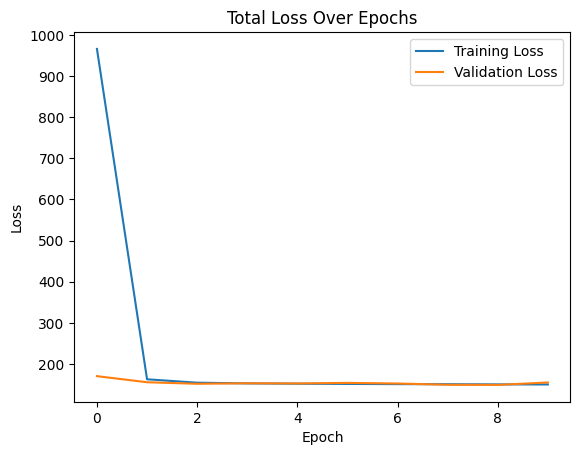

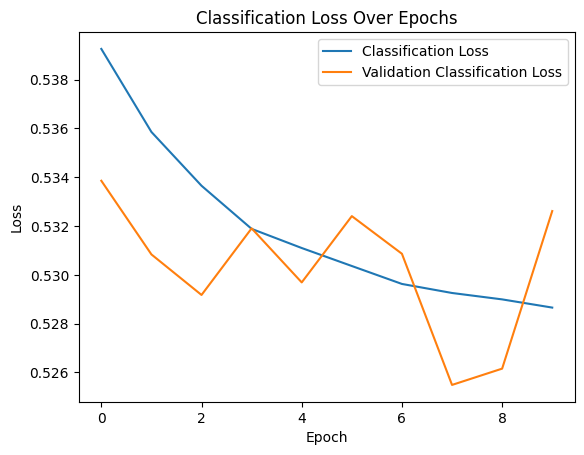

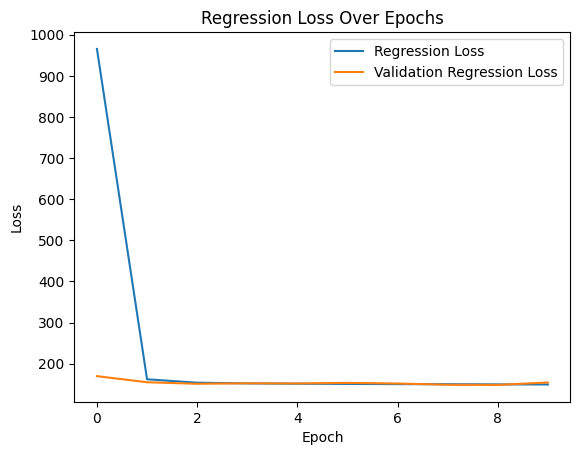

In [94]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Total Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar la pérdida de clasificación
plt.plot(history.history['classification_output_loss'], label='Classification Loss')
plt.plot(history.history['val_classification_output_loss'], label='Validation Classification Loss')
plt.title('Classification Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar la pérdida de regresión
plt.plot(history.history['regression_output_loss'], label='Regression Loss')
plt.plot(history.history['val_regression_output_loss'], label='Validation Regression Loss')
plt.title('Regression Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
predictions = model.predict(X_test_scaled)

   1/8915 [..............................] - ETA: 2:31

8915/8915 [==============================] - 3s 382us/step


In [61]:
Predicciones =  pd.DataFrame({
    'classification_output' : predictions[0].reshape(-1,predictions[0].shape[0])[0],
    'regression_output'     : predictions[1].reshape(-1,predictions[1].shape[0])[0]
})

In [121]:
dxt = scaler.inverse_transform(X_test_scaled)[100]
lne = []
for lim in np.linspace(0,5,500):
    dxt = dxt - np.array([dxt[0],0,0,0,0])
    lne.append(dxt + np.array([lim,0,0,0,0]))


In [122]:
Est_Class, Est_Reg = model.predict(scaler.fit_transform(lne))

16/16 [==============================] - 0s 467us/step


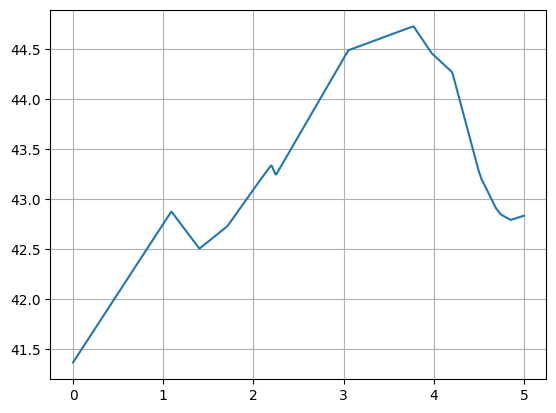

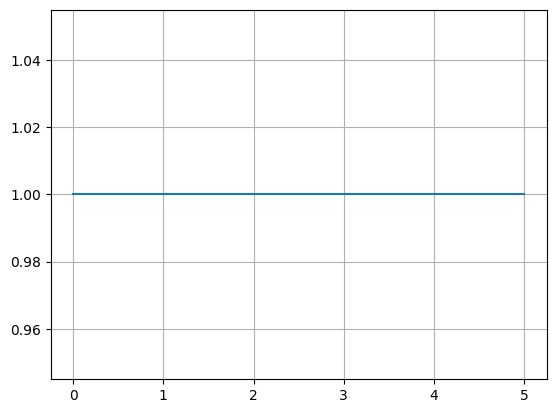

In [123]:
# Comportamiento en la Regresion de la Variable Estrella
plt.plot(np.linspace(0,5,500),Est_Reg)
plt.grid()
plt.show()
plt.plot(np.linspace(0,5,500),Est_Class)
plt.grid()
plt.show()

La cantidad de Estrellas no afecta al modelo de Clasificacion pero si al de regresion dando a entender que entre 3 y 4 existe mas descuento que en otra

0.06618419198732585
157/157 [==============================] - 0s 404us/step


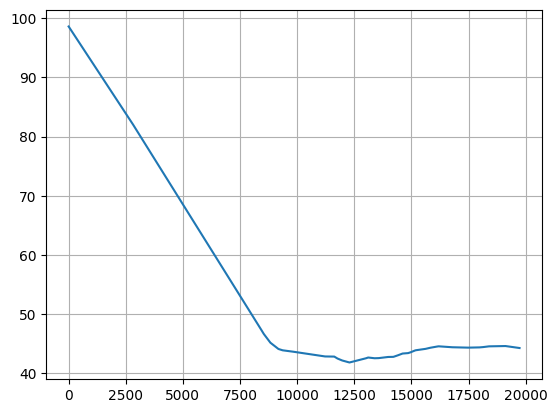

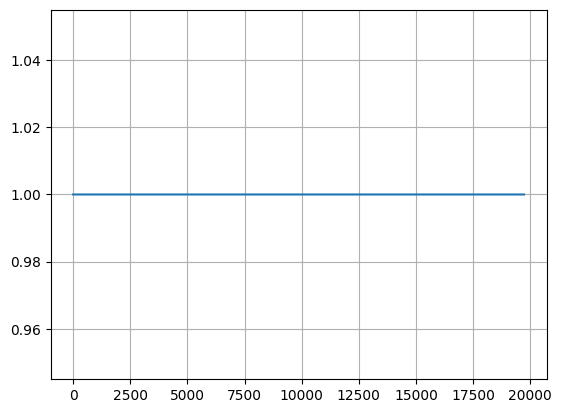

In [155]:
dxt = scaler.inverse_transform(X_test_scaled)[300]
lne = []
axs = np.linspace(Datos['precio de lista'].min(),Datos['precio de lista'].max(),5000)
print(dxt[2])
for lim in axs:
    dxt = dxt - np.array([0,0,dxt[2],0,0])
    lne.append(dxt + np.array([0,0,0,0,lim]))

Est_Class, Est_Reg = model.predict(scaler.fit_transform(lne))

plt.plot(axs,Est_Reg)
plt.grid()
plt.show()
plt.plot(axs,Est_Class)
plt.grid()
plt.show()

0.0

16/16 [==============================] - 0s 467us/step


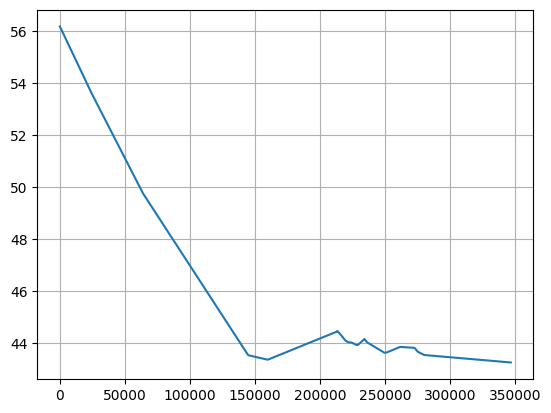

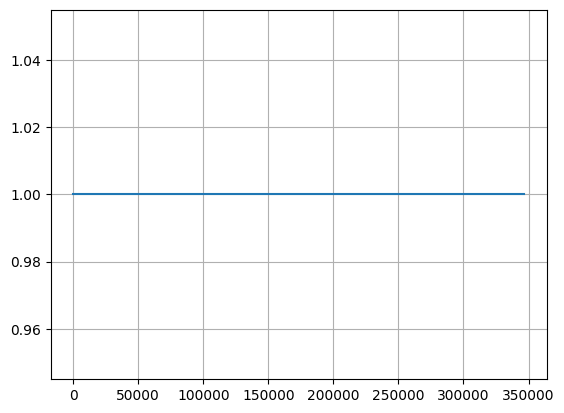

In [141]:
dxt = scaler.inverse_transform(X_test_scaled)[100]
lne = []
axs = np.linspace(Datos['comentarios'].min(),Datos['comentarios'].max(),500)
for lim in axs:
    dxt = dxt - np.array([0,dxt[1],0,0,0])
    lne.append(dxt + np.array([0,lim,0,0,0]))

Est_Class, Est_Reg = model.predict(scaler.fit_transform(lne))

plt.plot(axs,Est_Reg)
plt.grid()
plt.show()
plt.plot(axs,Est_Class)
plt.grid()
plt.show()

En el caso de los comentarios tampoco afectan al modelo de Clasificacion pero al de regresion con base logica afectan mas a los que tienen menos comentarios.

In [133]:
Datos['mejor vendido'].max()

1

16/16 [==============================] - 0s 400us/step


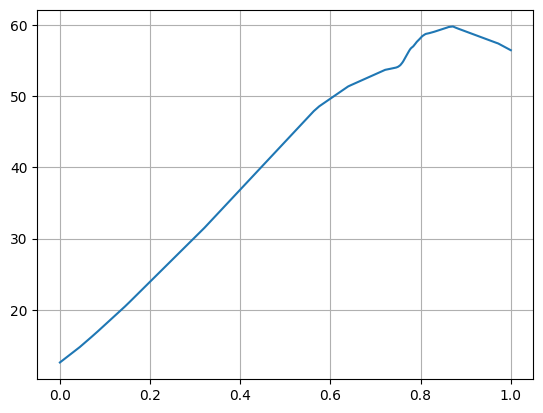

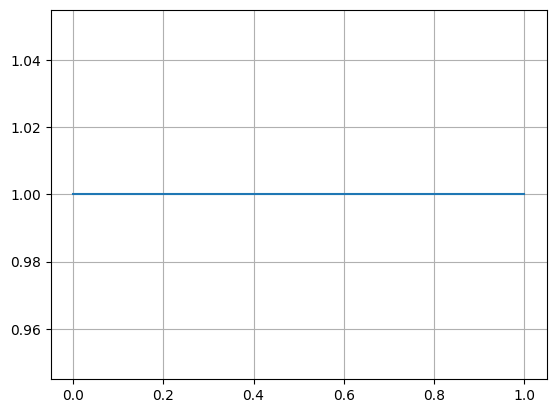

In [140]:
dxt = scaler.inverse_transform(X_test_scaled)[100]
lne = []
axs = np.linspace(Datos['mejor vendido'].min(),Datos['mejor vendido'].max(),500)
for lim in axs:
    dxt = dxt - np.array([0,0,0,dxt[3],0])
    lne.append(dxt + np.array([0,0,0,lim,0]))

Est_Class, Est_Reg = model.predict(scaler.fit_transform(lne))

plt.plot(axs,Est_Reg)
plt.grid()
plt.show()
plt.plot(axs,Est_Class)
plt.grid()
plt.show()

Efecto del Mejor vendido

16/16 [==============================] - 0s 467us/step


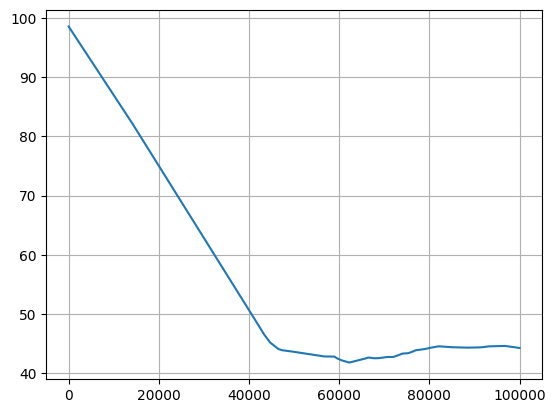

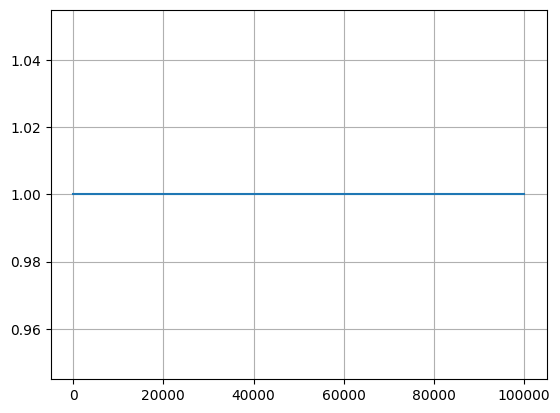

In [142]:
dxt = scaler.inverse_transform(X_test_scaled)[100]
lne = []
axs = np.linspace(Datos['ventas ultimo mes'].min(),Datos['ventas ultimo mes'].max(),500)
for lim in axs:
    dxt = dxt - np.array([0,0,0,0,dxt[4]])
    lne.append(dxt + np.array([0,0,0,0,lim]))

Est_Class, Est_Reg = model.predict(scaler.fit_transform(lne))

plt.plot(axs,Est_Reg)
plt.grid()
plt.show()
plt.plot(axs,Est_Class)
plt.grid()
plt.show()

La clasificacion fue una falta de respeto a la logica

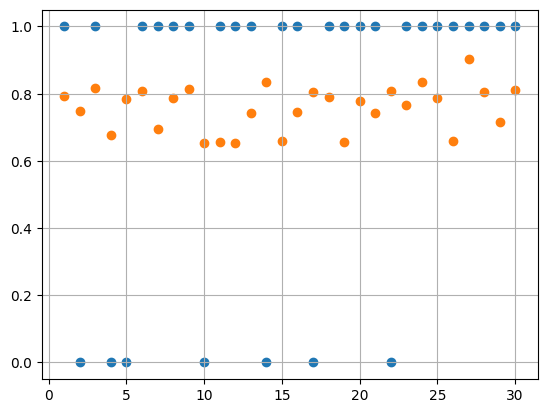

In [72]:
plt.scatter(np.linspace(1,30,30),y_class_test[:30])
plt.scatter(np.linspace(1,30,30),Predicciones['classification_output'].iloc[:30])
plt.grid()
plt.show()

Pero la regresion fue bastante fructifera

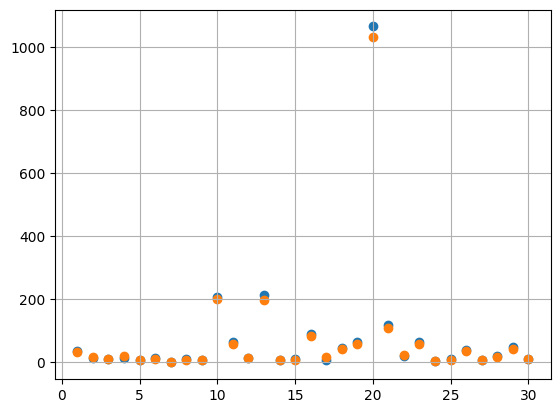

In [73]:
plt.scatter(np.linspace(1,30,30),y_reg_test[:30])
plt.scatter(np.linspace(1,30,30),Predicciones['regression_output'].iloc[:30])
plt.grid()
plt.show()